In [36]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u 
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.patches import Ellipse
from astropy.coordinates import Distance

In [37]:
hdul = fits.open('g28-37-ApogeeNet.fits')
hdul = hdul[1].data
t = Table(hdul)

In [38]:
center = SkyCoord(ra=280.7125*u.deg, dec=-4.0483*u.deg)
coords = SkyCoord(
    ra=t['ra'] * u.deg,
    dec=t['dec'] * u.deg
)

sep = center.separation(coords)
radius = 100 * u.arcmin
maskradius = sep <= radius
t = t[maskradius]

In [39]:
plx  = t['plx']
print(len(plx))
mask = np.where((plx < 0.25) & (plx > 0.15)) 

167


In [40]:
ra = t['ra']
print(len(ra))
dec = t['dec']
print(len(dec))

167
167


In [41]:
print(dec.min(), dec.max())

-4.6053433 -3.470392


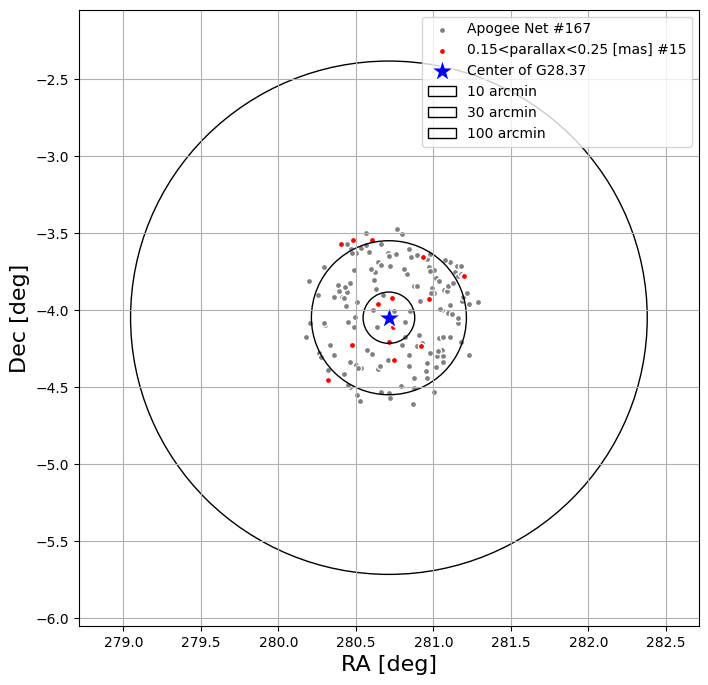

In [43]:
fig, ax = plt.subplots(figsize = (8, 8))

center_ra = 280.7125
center_dec = -4.0483

radii_arcmin = [10, 30, 100]
radii_deg = [r / 60 for r in radii_arcmin]

ax.scatter(ra, dec, color = 'gray', edgecolor = 'w', s = 20, label = f"Apogee Net #{len(ra)}")
ax.scatter(ra[mask], dec[mask], color = 'red', edgecolor = 'w', s = 20, label = f"0.15<parallax<0.25 [mas] #{len(ra[mask])}")
ax.scatter(center_ra, center_dec, color = 'blue', edgecolor = 'w', marker = "*", s= 300, label = "Center of G28.37")
ax.set_xlabel('RA [deg]', fontsize = 16)
ax.set_ylabel('Dec [deg]', fontsize = 16)

for r_deg, r_arcmin in zip(radii_deg, radii_arcmin):
    circle = patches.Circle(xy=(center_ra, center_dec), radius = r_deg, edgecolor='black', facecolor='none', label=f'{r_arcmin} arcmin')
    ax.add_patch(circle)

range = 2
ax.set_xlim(280.7125 - range, 280.7125 + range)
ax.set_ylim(-4.0483 - range, -4.0483 + range)

ax.grid()
ax.legend()
plt.savefig('g28_skymap_apogee.png', bbox_inches='tight')
plt.show()